# Exito financiero para futuras películas de CineMagix

## 1. EDA para el dataset de CineMagix

Importamos las librerías correspondientes

In [79]:
# Para trabajar con el dataset
import pandas as pd

# Para trabajar con los gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para trabajar con los datos
import scipy.stats as stats
from scipy.stats import kruskal

# Para trabajar con los modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Cargamos los datos

In [80]:
df_data = pd.read_csv(filepath_or_buffer="C:/Users/franc/Desktop/CineMagix-ML/cinemagix-movies.csv", sep=",",encoding='latin-1')

### Revisamos los datos del dataset

In [81]:
df_data

,ï»¿MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Munir Ozkul', 'Halit Akcatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."
9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer',...","['An', 'intimate', 'relationship', 'between', ..."


Primero notamos que hay una columna cuyo nombre está defectuoso, procederemos a renombrarla para evitar problemas de visualización más adelante

In [82]:
# Cambiamos el nombre de la columna
df_data = df_data.rename(columns={'ï»¿MovieName': 'MovieName'})

Análisis de la estructura general de los datos

In [83]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MovieName      10000 non-null  object 
 1   YearOfRelease  10000 non-null  int64  
 2   RunTime        10000 non-null  int64  
 3   MovieRating    10000 non-null  float64
 4   Votes          10000 non-null  int64  
 5   MetaScore      7974 non-null   float64
 6   Gross          7085 non-null   float64
 7   Genre          10000 non-null  object 
 8   Certification  9631 non-null   object 
 9   Director       10000 non-null  object 
 10  Stars          10000 non-null  object 
 11  Description    10000 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 937.6+ KB


Con los elementos obtenidos anteriormente, podemos saber que el dataset está compuesto por 10000 filas y 12 columnas, las cuales están dispuestas en elementos del tipo object, int64 y float64. Además vemos que hay varios elementos nulos

Podemos obtener mayor cantidad de información de los datos nulos

In [84]:
missing_values = df_data.isnull().sum()
missing_values

MovieName           0
YearOfRelease       0
RunTime             0
MovieRating         0
Votes               0
MetaScore        2026
Gross            2915
Genre               0
Certification     369
Director            0
Stars               0
Description         0
dtype: int64

Podemos graficar estos datos

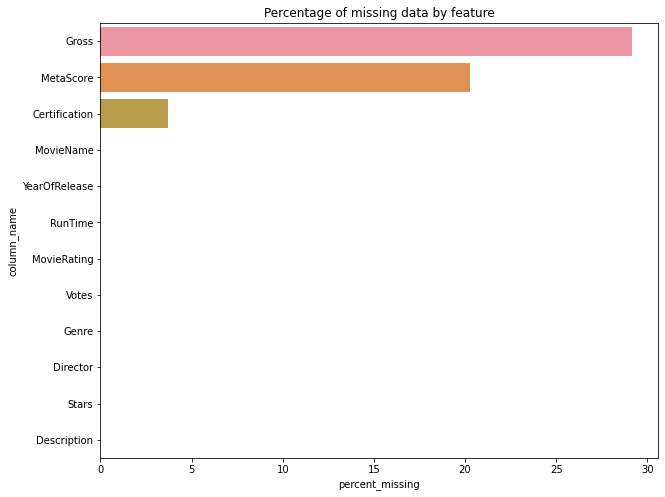

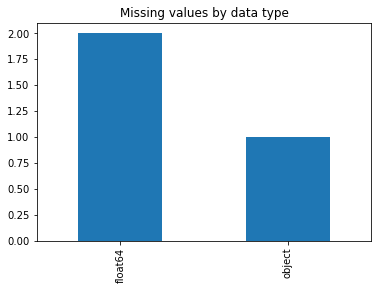

In [85]:
# Calculamos el porcentaje de datos faltantes por columna
missing_values_percent = df_data.isnull().sum() / len(df_data) * 100

# Creamos un DataFrame con los resultados
missing_values_df = pd.DataFrame({'column_name': df_data.columns, 'percent_missing': missing_values_percent})

# Ordenamos los resultados en orden descendente
missing_values_df.sort_values('percent_missing', inplace=True, ascending=False)

# Creamos un gráfico de barras para visualizar los datos faltantes por columna
plt.figure(figsize=(10, 8))
sns.barplot(x='percent_missing', y='column_name', data=missing_values_df)
plt.title('Percentage of missing data by feature')
plt.show()

# Creamos un gráfico de barras para visualizar los datos faltantes por tipo de datos
missing_values_by_dtype = df_data.dtypes[df_data.isnull().any()].value_counts()
missing_values_by_dtype.plot(kind='bar', title='Missing values by data type')
plt.show()

Podemos obtener cuantas filas duplicadas hay en el dataset

In [86]:
duplicated_rows = df_data.duplicated()

# Contamos el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

print('Número de filas duplicadas: ', num_duplicated_rows)

Número de filas duplicadas:  0


Vemos que no tenemos filas duplicadas

### Comprensión de Variables y Tipos de datos

Nuestro dataset presenta 3 tipos de datos: object, int64 y float64, a continuación procederemos a analizarlos

In [87]:
# Obtenemos el número de valores únicos en cada columna
unique_values = df_data.nunique()

print(unique_values)

MovieName        9632
YearOfRelease     107
RunTime           171
MovieRating        44
Votes            9304
MetaScore          93
Gross            4173
Genre             425
Certification      24
Director         4162
Stars            9947
Description      9996
dtype: int64


#### Object:

Los datos tipo object corresponden a lo que comunmente conocemos como strings, para el presente dataset tenemos 6 variables que son del tipo object, estas variables son: MovieName, Genre, Certification, Director, Stars y Description. Todas estas variables son de tipo nominal

### Int64:

Los datos de tipo int64 corresponden a datos de tipo entero, para el presente dataset tenemos 3 variables de tipo int64, estas son: YearOfRelease, RunTime y Votes. Todas estas variables se pueden analizar como ratio

#### Float64:

Finalmente los datos del tipo float64 corresponden a valores decimales y tenemos 3 variables que corresponden a este tipo de datos: MovieRating, MetaScore y Gross. Las 3 variables son de tipo ratio

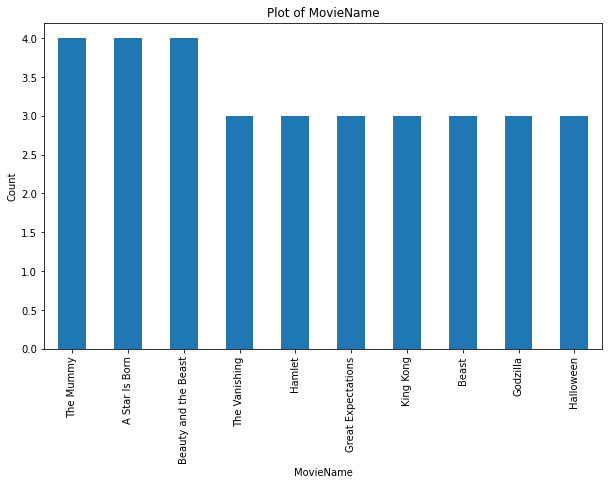

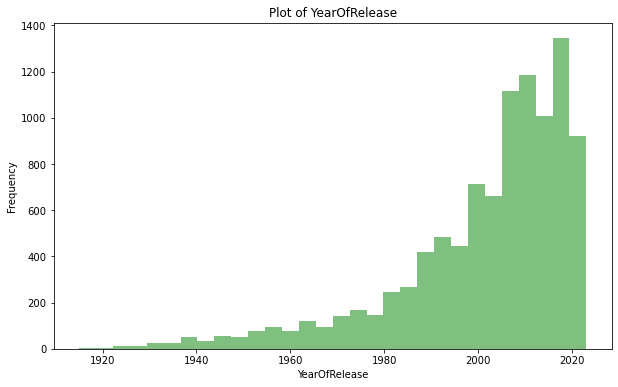

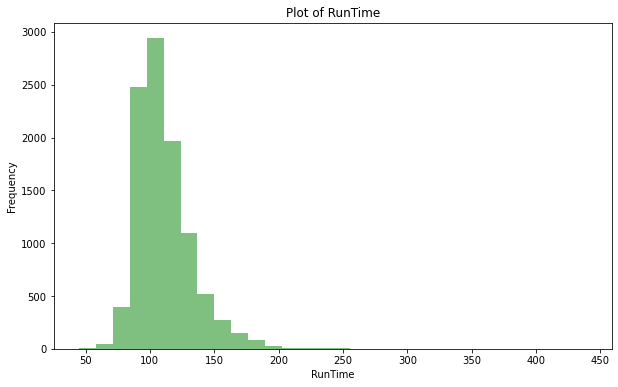

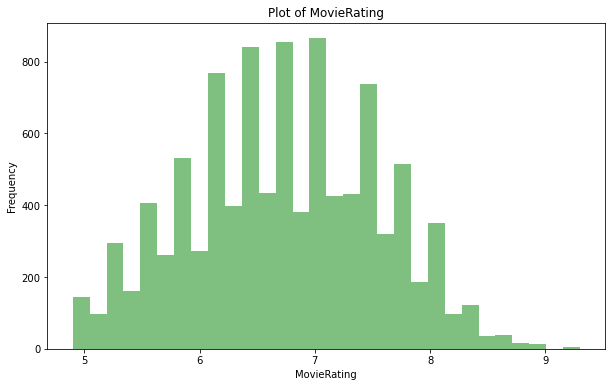

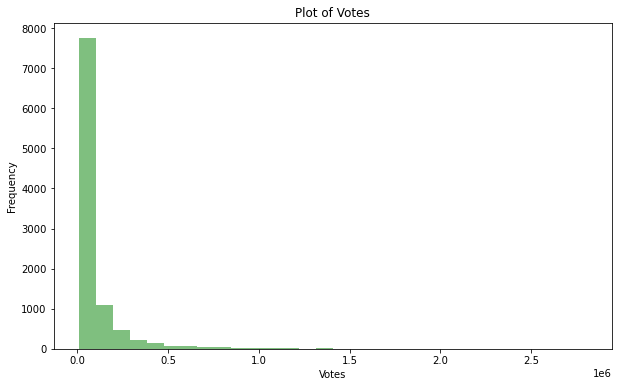

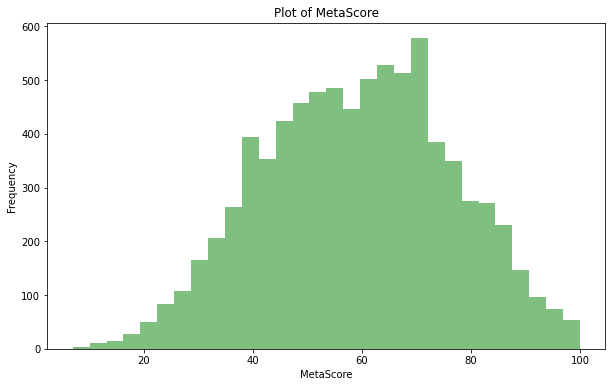

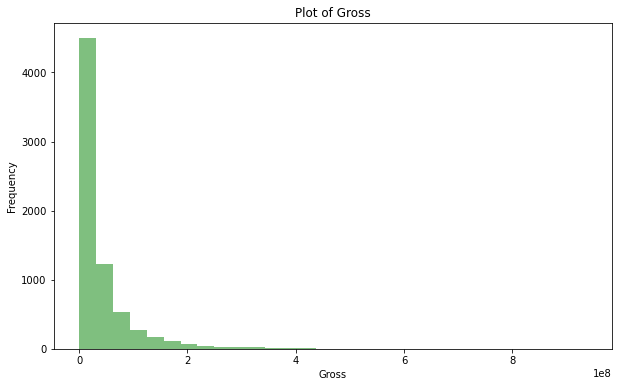

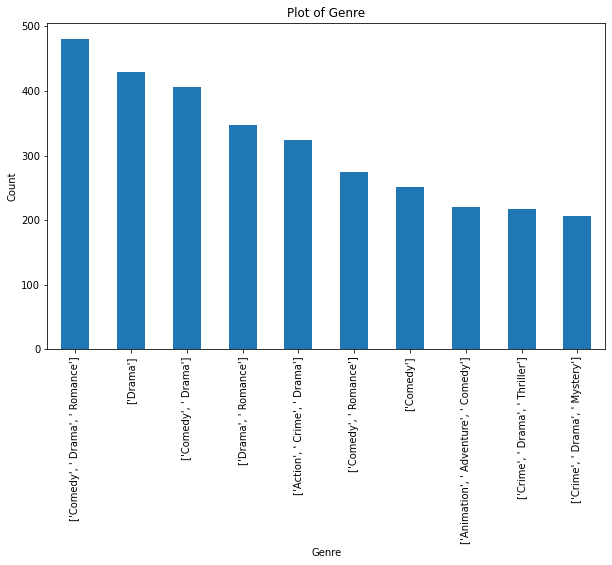

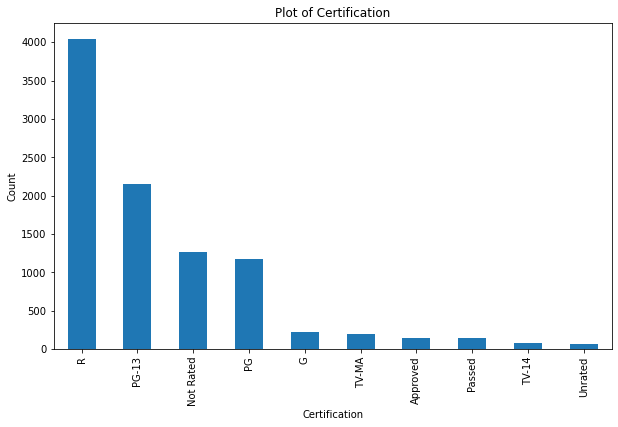

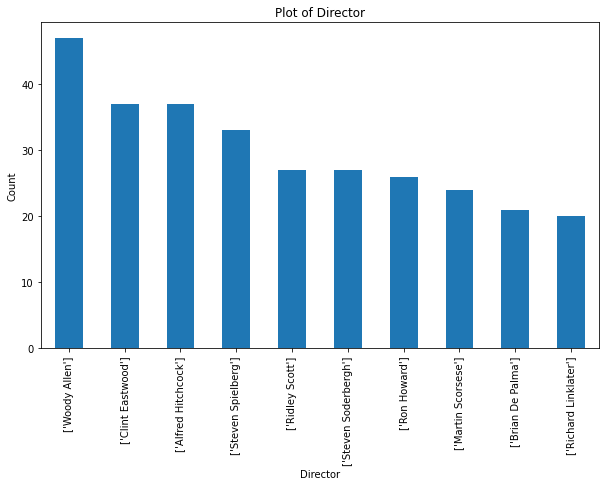

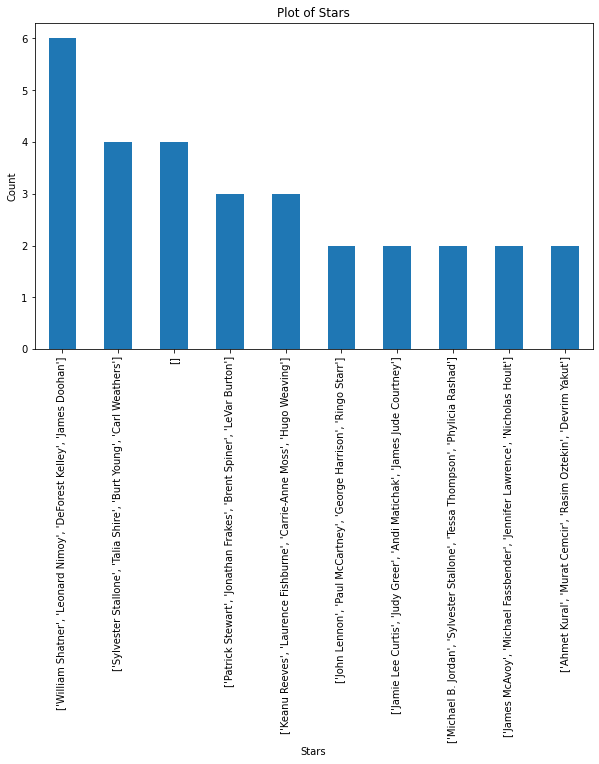

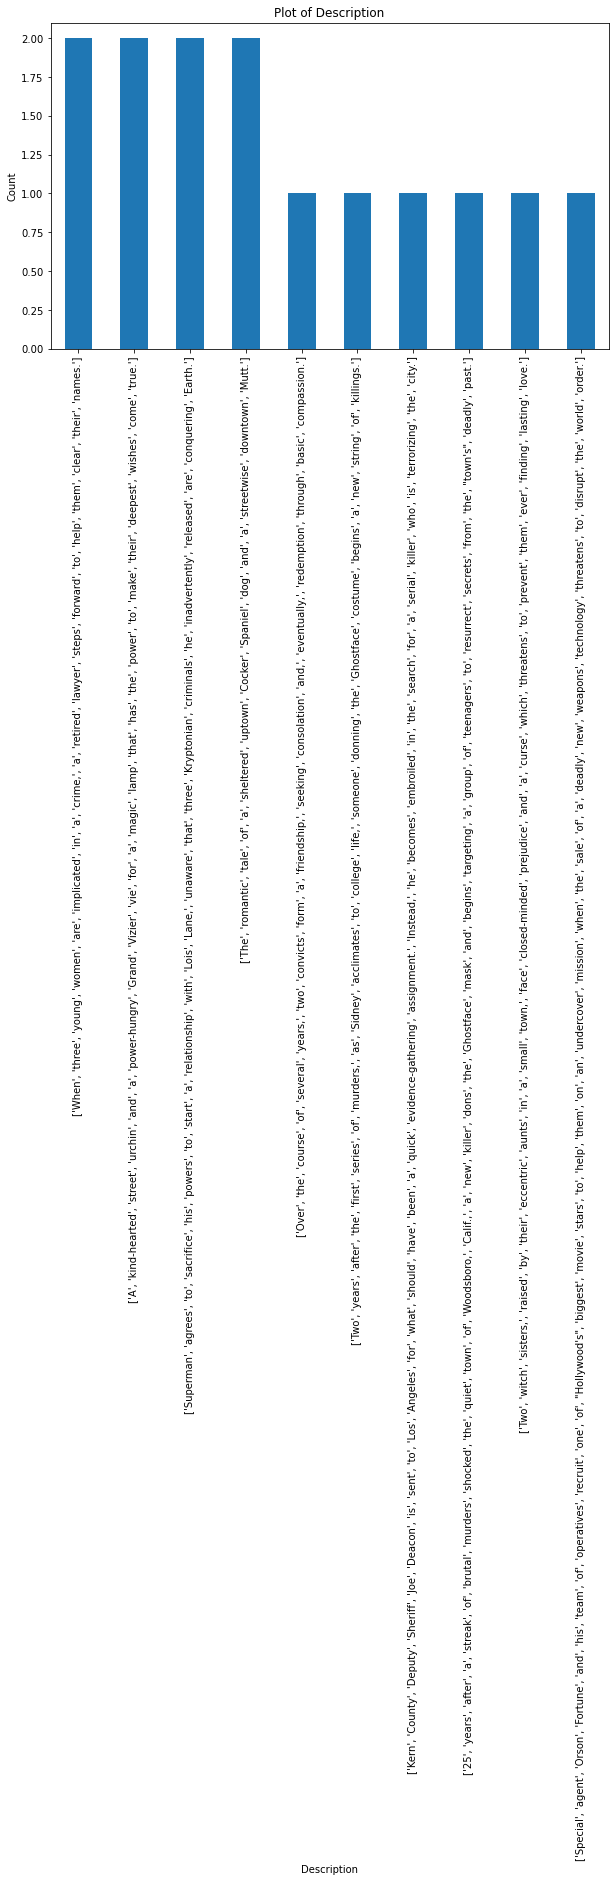

In [88]:
# Listas de columnas numéricas y categóricas
num_cols = ['YearOfRelease', 'RunTime', 'MovieRating', 'Votes', 'MetaScore', 'Gross']
cat_cols = ['MovieName', 'Genre', 'Certification', 'Director', 'Stars', 'Description']

# Creamos un histograma o un gráfico de barras para cada columna
for col in df_data.columns:
    plt.figure(figsize=(10, 6))
    
    # Si la columna es numérica, creamos un histograma
    if col in num_cols:
        plt.hist(df_data[col].dropna(), bins=30, alpha=0.5, color='g')
        plt.ylabel('Frequency')
    
    # Si la columna es categórica, creamos un gráfico de barras
    elif col in cat_cols:
        df_data[col].value_counts().head(10).plot(kind='bar')
        plt.ylabel('Count')
    
    plt.title(f'Plot of {col}')
    plt.xlabel(col)
    plt.show()

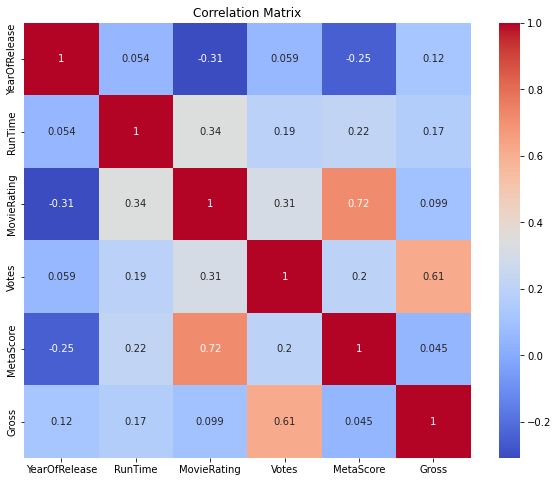

In [89]:
# Seleccionamos solo las columnas numéricas
num_data = df_data[num_cols]

# Calculamos la matriz de correlación
corr_matrix = num_data.corr()
plt.figure(figsize=(10, 8))

# Dibujamos la matriz de correlación usando seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

### Analizaremos las variables de tipo Object nominales (categóricas)

In [90]:
def analyze_categorical_variables(df, target=None):
    cat_cols = df.select_dtypes(include=['object']).columns
    
    for col in cat_cols:
        # Imprimimos el analisis descriptivo de la columna
        print(f"Descriptive Analysis for {col}:")
        print(df[col].describe())
        print("\n")
        
        # Generamos un gráfico de barras de la columna
        df[col].value_counts().head(10).plot(kind='bar')
        plt.title(f'Bar plot of {col}')
        plt.ylabel('Count')
        plt.show()

        # Obtenemos las proporciones de las 10 categorías principales
        top_10_proportions = df[col].value_counts(normalize=True).head(10)

        print(f"Proportions for the top 10 categories of {col}:")
        print(top_10_proportions)
        print("\n")
        
        # Generamos un gráfico de pastel de la columna
        top_10_proportions.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie chart of {col}')
        plt.ylabel('')
        plt.show()
        
        # Si se proporciona una variable objetivo, realizamos un análisis adicional
        if target is not None:
            top_10_categories = df[col].value_counts().head(10).index
            df_filtered = df[df[col].isin(top_10_categories)]

            # Generamos un gráfico de barras de la variable objetivo agrupada por la columna
            plt.figure(figsize=(10, 6))
            df_filtered.groupby(col)[target].mean().plot(kind='bar')
            plt.title(f'Bar plot of mean {target} grouped by {col}')
            plt.ylabel(f'Mean {target}')
            plt.show()
            
            # Creamos una tabla de contingencia entre la columna y la variable objetivo y realizamos prueba de chi-cuadrado
            contingency_table = pd.crosstab(df[col], df[target])
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

            print(f"Chi-square test between {col} and {target}:")
            print(f"Chi-square statistic: {chi2}, p-value: {p}")
            print("\n")

Descriptive Analysis for MovieName:
count         10000
unique         9632
top       The Mummy
freq              4
Name: MovieName, dtype: object




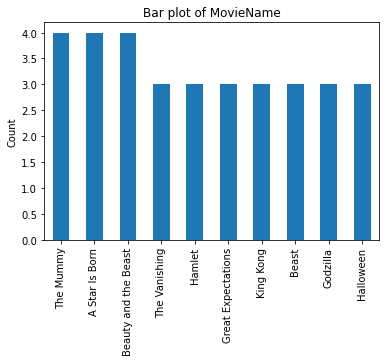

Proportions for the top 10 categories of MovieName:
The Mummy               0.0004
A Star Is Born          0.0004
Beauty and the Beast    0.0004
The Vanishing           0.0003
Hamlet                  0.0003
Great Expectations      0.0003
King Kong               0.0003
Beast                   0.0003
Godzilla                0.0003
Halloween               0.0003
Name: MovieName, dtype: float64




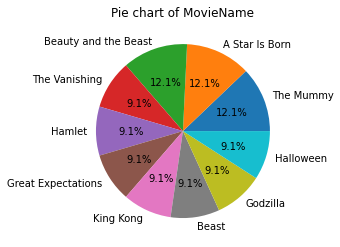

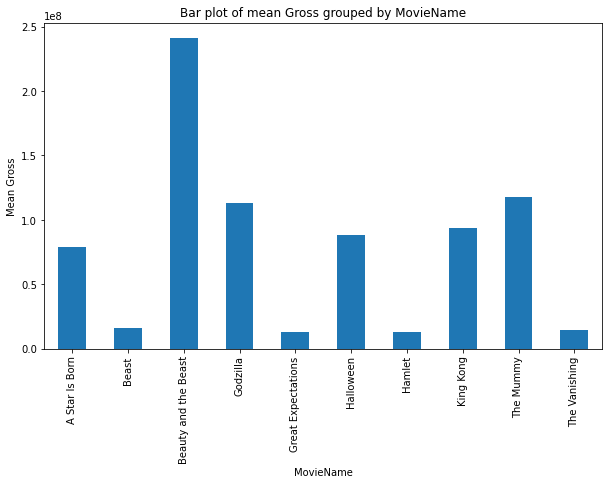

Chi-square test between MovieName and Gross:
Chi-square statistic: 28775751.885014318, p-value: 0.9999869556725236


Descriptive Analysis for Genre:
count                                10000
unique                                 425
top       ['Comedy', ' Drama', ' Romance']
freq                                   481
Name: Genre, dtype: object




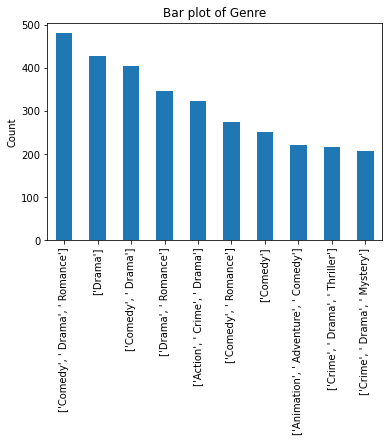

Proportions for the top 10 categories of Genre:
['Comedy', ' Drama', ' Romance']          0.0481
['Drama']                                 0.0429
['Comedy', ' Drama']                      0.0406
['Drama', ' Romance']                     0.0347
['Action', ' Crime', ' Drama']            0.0324
['Comedy', ' Romance']                    0.0274
['Comedy']                                0.0252
['Animation', ' Adventure', ' Comedy']    0.0221
['Crime', ' Drama', ' Thriller']          0.0217
['Crime', ' Drama', ' Mystery']           0.0207
Name: Genre, dtype: float64




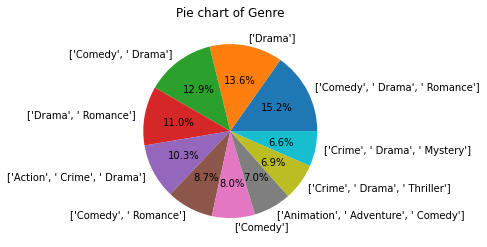

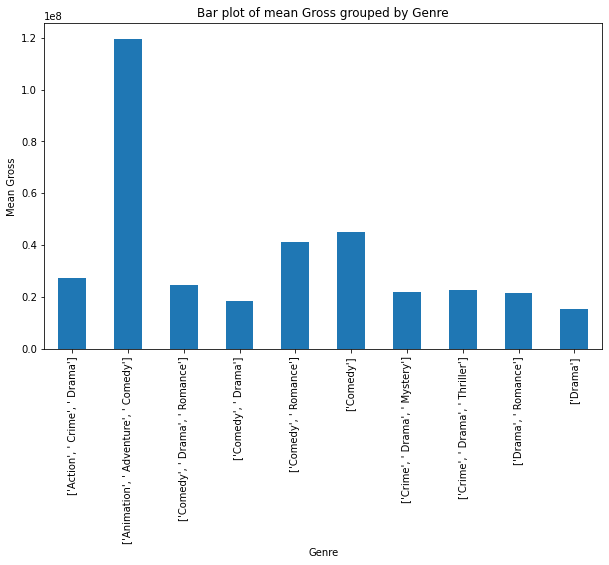

Chi-square test between Genre and Gross:
Chi-square statistic: 1458525.3591123107, p-value: 1.0


Descriptive Analysis for Certification:
count     9631
unique      24
top          R
freq      4048
Name: Certification, dtype: object




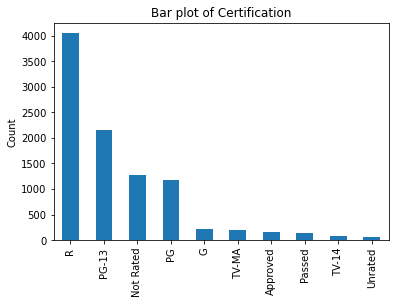

Proportions for the top 10 categories of Certification:
R            0.420309
PG-13        0.223134
Not Rated    0.132074
PG           0.121898
G            0.023051
TV-MA        0.020766
Approved     0.015679
Passed       0.015575
TV-14        0.008618
Unrated      0.007372
Name: Certification, dtype: float64




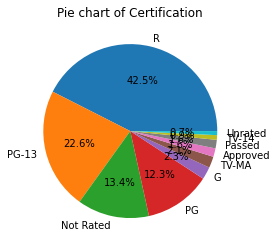

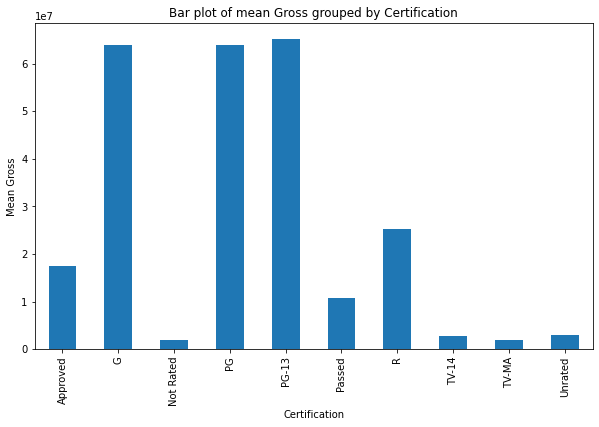

Chi-square test between Certification and Gross:
Chi-square statistic: 59116.53196030081, p-value: 1.0


Descriptive Analysis for Director:
count               10000
unique               4162
top       ['Woody Allen']
freq                   47
Name: Director, dtype: object




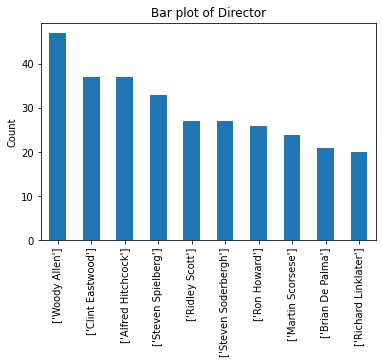

Proportions for the top 10 categories of Director:
['Woody Allen']          0.0047
['Clint Eastwood']       0.0037
['Alfred Hitchcock']     0.0037
['Steven Spielberg']     0.0033
['Ridley Scott']         0.0027
['Steven Soderbergh']    0.0027
['Ron Howard']           0.0026
['Martin Scorsese']      0.0024
['Brian De Palma']       0.0021
['Richard Linklater']    0.0020
Name: Director, dtype: float64




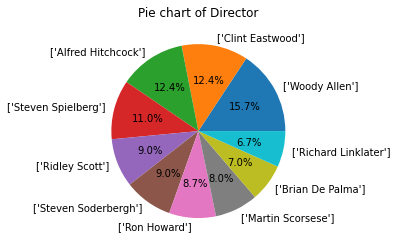

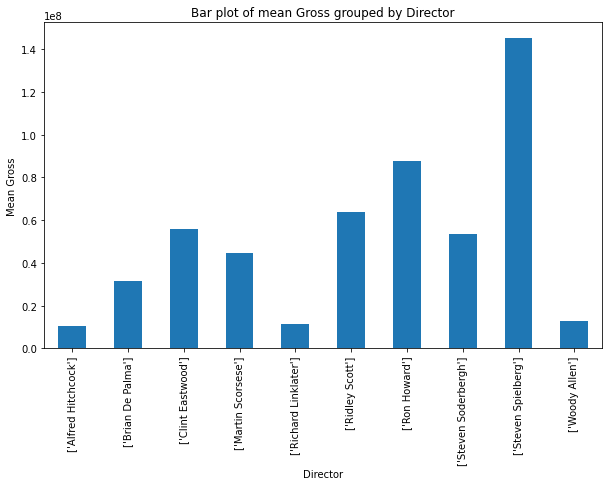

Chi-square test between Director and Gross:
Chi-square statistic: 10424198.908539033, p-value: 1.0


Descriptive Analysis for Stars:
count                                                 10000
unique                                                 9947
top       ['William Shatner', 'Leonard Nimoy', 'DeForest...
freq                                                      6
Name: Stars, dtype: object




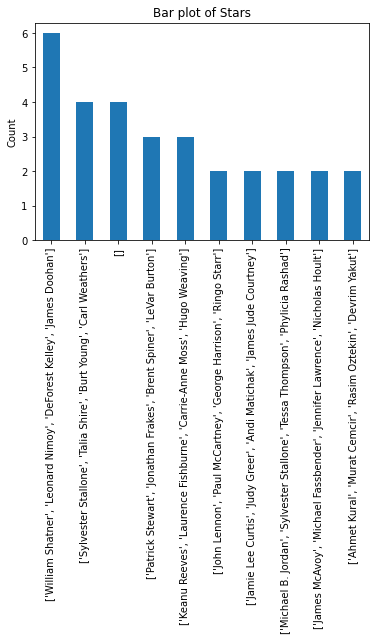

Proportions for the top 10 categories of Stars:
['William Shatner', 'Leonard Nimoy', 'DeForest Kelley', 'James Doohan']             0.0006
['Sylvester Stallone', 'Talia Shire', 'Burt Young', 'Carl Weathers']                0.0004
[]                                                                                  0.0004
['Patrick Stewart', 'Jonathan Frakes', 'Brent Spiner', 'LeVar Burton']              0.0003
['Keanu Reeves', 'Laurence Fishburne', 'Carrie-Anne Moss', 'Hugo Weaving']          0.0003
['John Lennon', 'Paul McCartney', 'George Harrison', 'Ringo Starr']                 0.0002
['Jamie Lee Curtis', 'Judy Greer', 'Andi Matichak', 'James Jude Courtney']          0.0002
['Michael B. Jordan', 'Sylvester Stallone', 'Tessa Thompson', 'Phylicia Rashad']    0.0002
['James McAvoy', 'Michael Fassbender', 'Jennifer Lawrence', 'Nicholas Hoult']       0.0002
['Ahmet Kural', 'Murat Cemcir', 'Rasim Oztekin', 'Devrim Yakut']                    0.0002
Name: Stars, dtype: float64




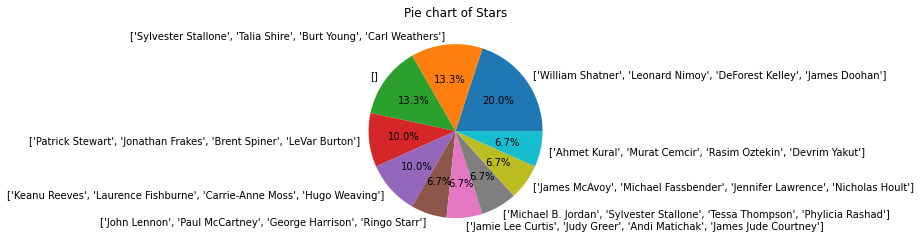

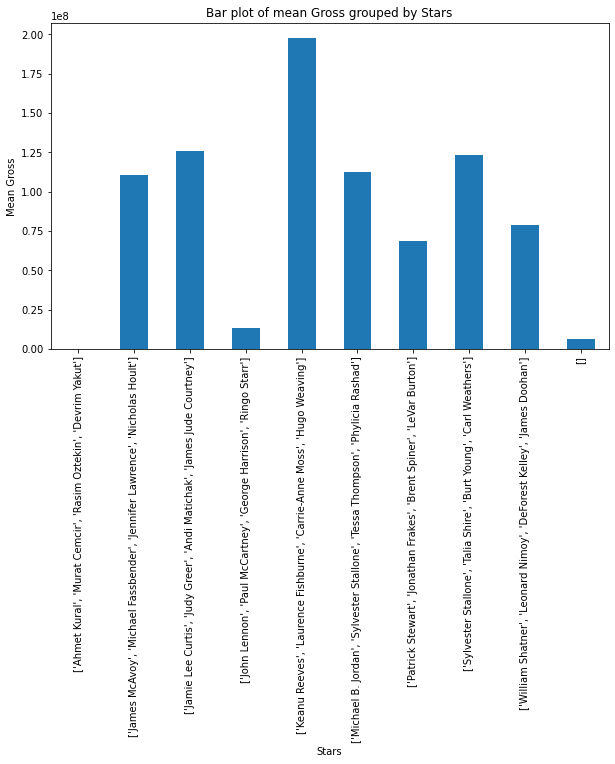

Chi-square test between Stars and Gross:
Chi-square statistic: 29299427.083333347, p-value: 1.0


Descriptive Analysis for Description:
count                                                 10000
unique                                                 9996
top       ['When', 'three', 'young', 'women', 'are', 'im...
freq                                                      2
Name: Description, dtype: object




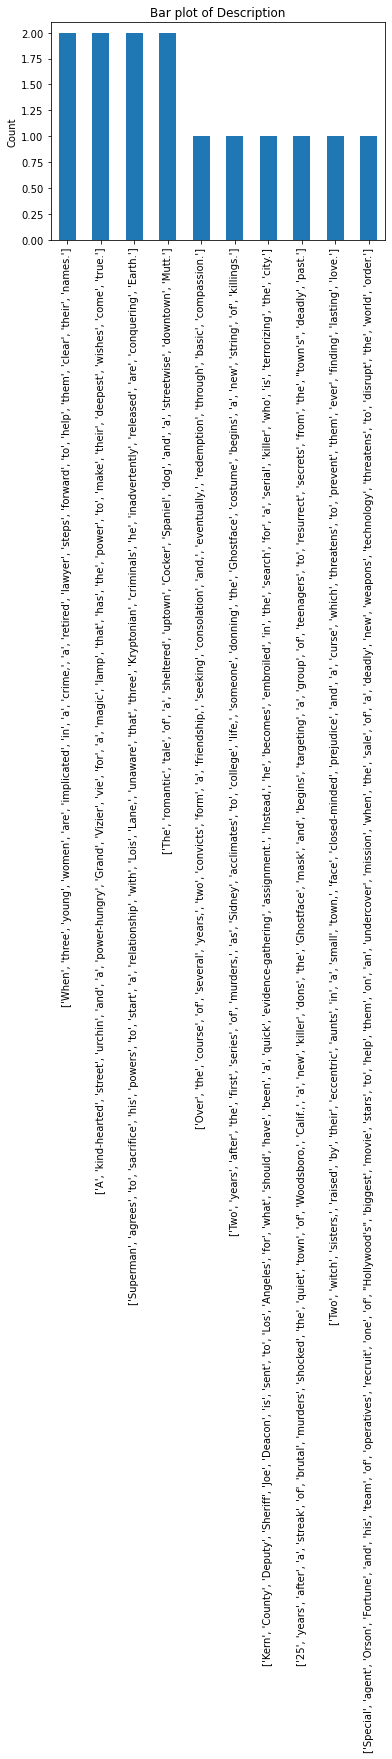

Proportions for the top 10 categories of Description:
['When', 'three', 'young', 'women', 'are', 'implicated', 'in', 'a', 'crime,', 'a', 'retired', 'lawyer', 'steps', 'forward', 'to', 'help', 'them', 'clear', 'their', 'names.']                                                                                                                                                                            0.0002
['A', 'kind-hearted', 'street', 'urchin', 'and', 'a', 'power-hungry', 'Grand', 'Vizier', 'vie', 'for', 'a', 'magic', 'lamp', 'that', 'has', 'the', 'power', 'to', 'make', 'their', 'deepest', 'wishes', 'come', 'true.']                                                                                                                                 0.0002
['Superman', 'agrees', 'to', 'sacrifice', 'his', 'powers', 'to', 'start', 'a', 'relationship', 'with', 'Lois', 'Lane,', 'unaware', 'that', 'three', 'Kryptonian', 'criminals', 'he', 'inadvertently', 'released', 'are', 'conquering', 'Earth.']  

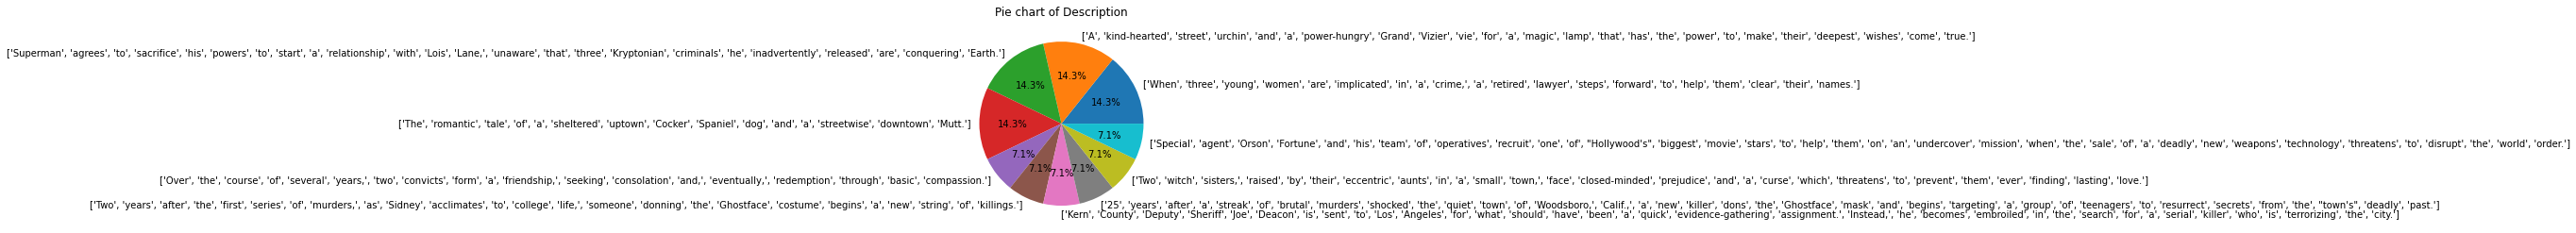

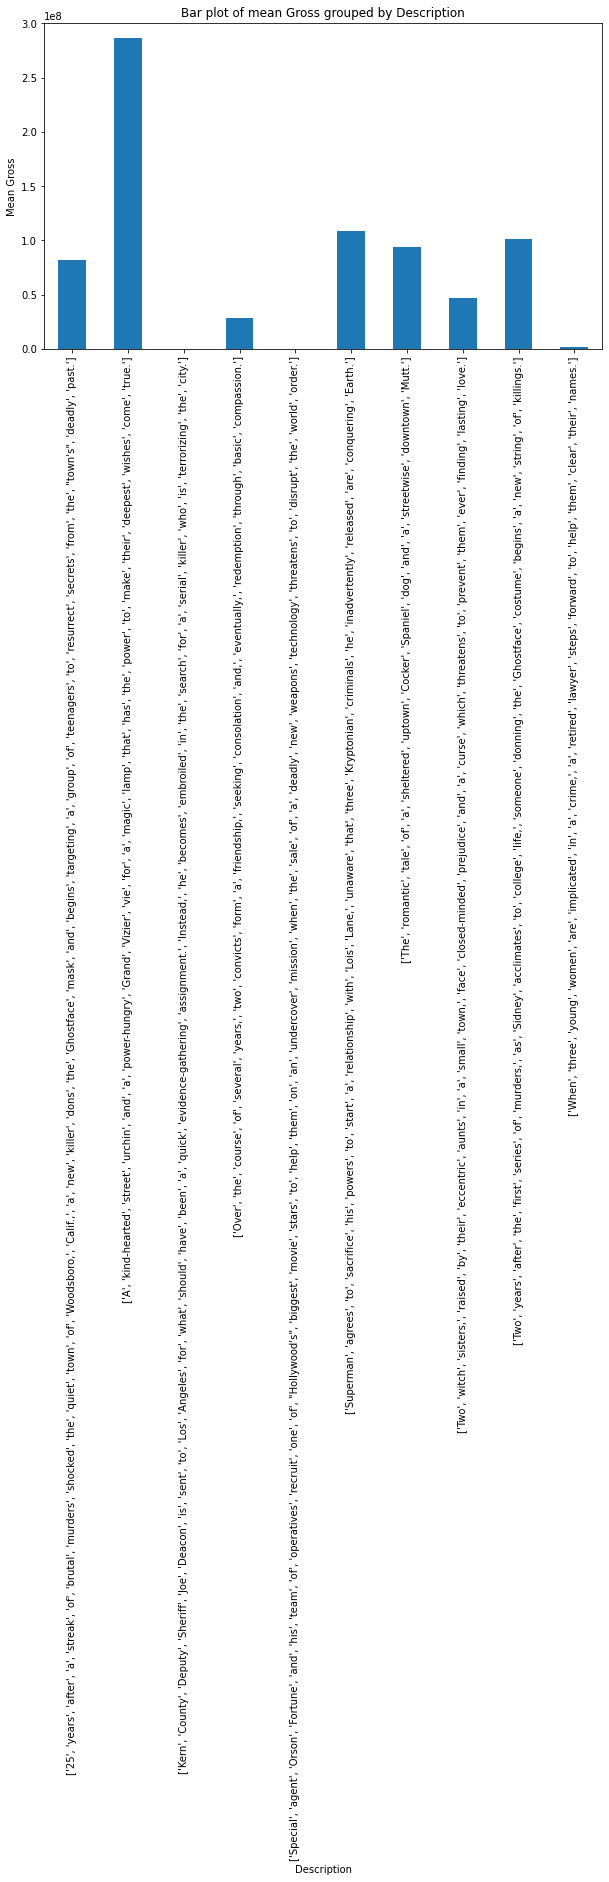

Chi-square test between Description and Gross:
Chi-square statistic: 29551535.00000008, p-value: 0.43492353679732926




In [91]:
analyze_categorical_variables(df_data, target='Gross')

### Interpretación de resultados para variables nominales

#### MovieName:

+ Del análisis descriptivo obtenemos que hay 10000 valores, de los cuales 9632 son únicos, es decir que hay algunas películas con el mismo nombre.
+ Del gráfico de conteo obtuvimos que los nombres más repetidos son: The Mummy, A Star Is Born y Beauty And The Beast.
+ De las proporciones de los 10 primeras categorías y del gráfico de torta, obtenemos que los porcentajes son bastante bajos, esto significa que la mayoría de las películas en el conjunto de datos son únicas.
+ Del gráfico de barras de la media, obtenemos que Beauty and the Beast generó más ingresos brutos que el resto de películas, sin embargo, eso no significa que haya sido más rentable que el resto de películas.
+ De la prueba de chi-cuadrado, obtenemos la asociación entre MovieName y Gross, el valor de chi-cuadrado es de 28775751.885014318, el cual es un valor grande, generalmente indicaría una fuerte asociación, sin embargo el valor p-value es de 0.9999869556725236. Un valor cercano a 1, esto sugiere que no debemos rechazar la hipótesis nula, que es que MovieName y Gross son independientes.
+ Basándonos en lo anterior, concluimos que no tenemos evidencia suficiente para establecer una asociación significativa entre el nombre de la película y los ingresos generados por esta.

#### Genre:

+ Del análisis descriptivo obtenemos que hay 10000 observaciones y 425 géneros de películas únicos, en realidad estos son combinaciones de géneros, por lo que podemos separar dichas tuplas, para más adelante hacer un modelo más exacto.
+ Del gráfico de conteo, obtenemos que la combinación más común es la de Comedy, Drama y Romance, que aparece casi 500 veces en el conjunto de datos.
+ De las proporciones y gráfico de torta, tenemos que no hay una combinación que tenga un porcentaje significativamente mayor por sobre las otras, esto sugiere, que hay una gran cantidad combinaciones, de las cuales los resultados son también variados.
+ Del gráfico de barras de la media, obtenemos que Animation, Adventure y Comedy obtuvieron mayores ingresos que el resto de combinaciones, esto puede deberse a distintos factores, como por ejemplo la capacidad de atraer un público más amplio (adultos y niños), sin embargo, al no tener los costos de producción, no podemos determinar si es realmente rentable.
+ Del chi-cuadrado, obtenemos la asociación entre Genre y Gross, el valor de chi-cuadrado es de 1458525.3591123107, lo cual puede indicar una fuerte asociación, pero el p-value es de 1.0, el máximo valor posible, lo que indica que no podemos rechazar la hipótesis nula (que sean independientes).
+ Finalmente, podemos concluir que no existe una clara relación entre el género de la película y sus ingresos.

#### Certification:

+ Del análisis descriptivo obtenemos que hay 9631 valores (ya que tenemos valores nulos), de un total de 24 clasificaciones, también nos muestra que la variable más común es R, con 4048 apariciones, esta variable corresponde a películas restringidas a mayores de 17 años, a menos que estén acompañados por sus padres.
+ Del gráfico de conteo obtenemos que a R le sigue PG-13 con menos de la mitad de apariciones y luego Not Rated.
+ De las proporciones y gráfico de torta, obtenemos que R aparece un 42%, mientras que PG-13 un 22% y Not Rated un 13%, esto sugiere que la mayoría de películas del conjunto de datos están destinadas a un público adulto, lo que puede limitar las posibles ganancias.
+ Del gráfico de barras, Obtenemos que G, PG y PG-13 son los que más ingresos han generado, este puede deberse a que sean películas para un público más amplio o que sean más comerciales.
+ Del chi-cuadrado, su valor es de 59116.53196030081, lo cual indica fuerte asociación, pero su p-value es de 1.0, por lo que no podemos desechar la hipótesis de que son independientes.
+ Conclusión: aunque la clasificación puede tener un impacto en sus ingresos, esta por si sola, no puede predecir el éxito financiero de una película.

#### Director:

+ Del análisis descriptivo obtenemos que hay 10000 valores, de 4162 directores distintos, también nos muestra que el director que más aparece es Woody Allen, con 47 apariciones.
+ Del gráfico de conteo obtenemos que a Woody Allen le siguen otros directores de renombre, como Clint Eastwood, Alfred Hitchcook, Steven Spielberg, etc.
+ De las proporciones y gráfico de torta, obtenemos que Woody Allen es el director más común, sin embargo la distribución de directores por películas en el conjunto de datos es muy dispersa.
+ Del gráfico de barras, Obtenemos que Steven Spielberg, Ron Howard y Riddley Scott son los directores que más ganancias han generado, esto puede ser debido a su fama o su capacidad de atraer actores famosos.
+ Del chi-cuadrado, su valor es de 10424198.908539033, que es un valor alto, sin embargo el p-value es 1.0, por lo que no podemos rechazar que sean independientes.
+ Conclusión: aunque el director puede tener un impacto en las ganancias, hay muchos otros factores que puedan influir en el éxito financiero de una película.

#### Stars:

+ Del análisis descriptivo obtenemos que hay 10000 valores, con 9947 combinaciones únicas de estrellas, lo que significa que hay una gran variedad de estrellas en el conjunto de datos.
+ Del gráfico de conteo obtenemos que William Shatner, Leonard Nimoy y DeForest Kelley son la combinación más repetida, sin embargo estos actores o están muertos o están demasiado ancianos para actuar a día de hoy.
+ De las proporciones y gráfico de torta, obtenemos un poco más de lo mismo, actores que fueron un éxito en su momento, pero a que día de hoy o están muertos o retirados, son pocas las combinaciones con actores actuales.
+ Del gráfico de barras, obtenemos el elenco de matrix (Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss y Hugo Weaving), son los que más ganancias han generado, estos si son actores actuales que podrían tener éxito y atraer público.
+ Del chi-cuadrado, su valor es de 29299427.083333347, lo cual es altísimo, sin embargo, p-value = 1, lo que significa que no podemos descartar que sean independientes.
+ En Conclusión, las estrellas no necesariamente implican éxito económico en una película, como ejemplo, tenemos las películas animadas que sin tener estrellas, logran tener éxito.

#### Description:

+ Del análisis descriptivo obtenemos que hay 10000 valores, con 9996 descripciones únicas, lo que significa que casi ninguna se repite.
+ Del gráfico de conteo, no obtenemos mucha información, más que aquellas descripciones que se repiten.
+ De las proporciones y gráfico de torta, obtenemos un poco más de lo mismo, las proporciones son tan bajas, que no hay una que sea particularmente común.
+ Del gráfico de barras, obtenemos quee hay una descripción que obtuvo más ganancias, pero no necesariamente indica que sea gracias a la descripción.
+ Del chi-cuadrado, su valor es de 29551535.00000008, lo cual es grande, pero el p-value es de 0.43492353679732926, lo cual sobrepasa el umbral de 0.05, por lo que no podemos rechazar que sean independientes.
+ En Conclusión, no podemos establecer relación entre las descripciones y las ganancias obtenidas

### Análisis de Variables Numéricas Enteras

In [92]:
def analyze_numeric_variables_int(df, target=None):
    df_copy = df.copy()
    
    num_cols = df_copy.select_dtypes(include=['int64']).columns
    
    for col in num_cols:
        # Reemplazamos los valores nulos con la media
        df_copy[col].fillna(df_copy[col].mean(), inplace=True)
        
        # Imprimimos el analisis descriptivo de la columna
        print(f"Descriptive Analysis for {col}:")
        print(df_copy[col].describe())
        print("\n")
        
        # Generamos un histograma de la columna
        plt.figure(figsize=(10, 6))
        sns.histplot(df_copy[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.show()
        
        # Si se proporciona una variable objetivo, realizamos un análisis adicional
        if target is not None:
            # Reemplazamos los valores nulos en la variable objetivo con la media
            df_copy[target].fillna(df_copy[target].mean(), inplace=True)
            
            # Generamos un gráfico de dispersión entre la columna y la variable objetivo
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df_copy[col], y=df_copy[target])
            plt.title(f'Scatter plot of {col} and {target}')
            plt.show()
            
            # Realizamos una prueba de Kruskal-Wallis entre la columna y la variable objetivo
            statistic, p_value = kruskal(df_copy[col], df_copy[target])
            print(f"Kruskal-Wallis test between {col} and {target}: H-statistic: {statistic}, p-value: {p_value}")
            print("\n")

Descriptive Analysis for YearOfRelease:
count    10000.000000
mean      2001.413600
std         18.597804
min       1915.000000
25%       1994.000000
50%       2007.000000
75%       2015.000000
max       2023.000000
Name: YearOfRelease, dtype: float64




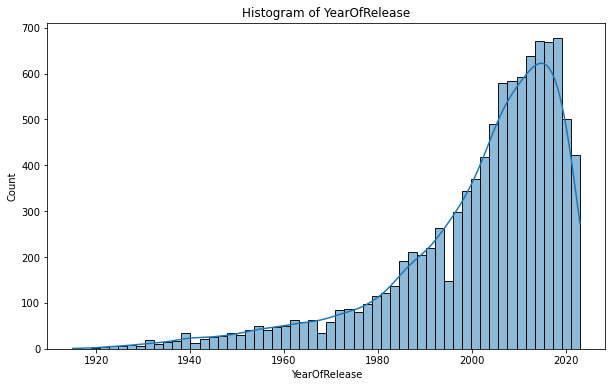

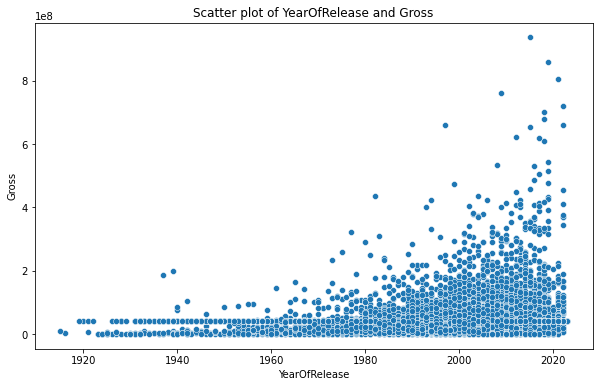

Kruskal-Wallis test between YearOfRelease and Gross: H-statistic: 14753.496040277349, p-value: 0.0


Descriptive Analysis for RunTime:
count    10000.000000
mean       110.725000
std         22.053073
min         45.000000
25%         96.000000
50%        107.000000
75%        121.000000
max        439.000000
Name: RunTime, dtype: float64




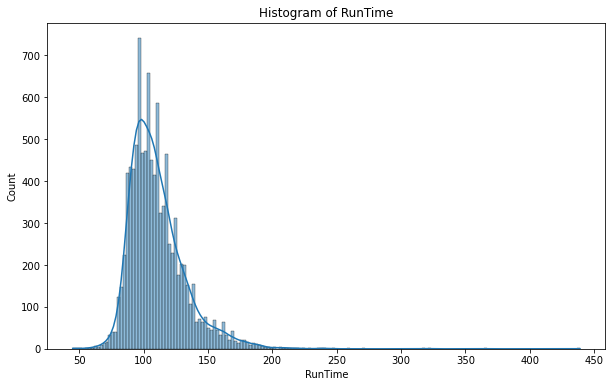

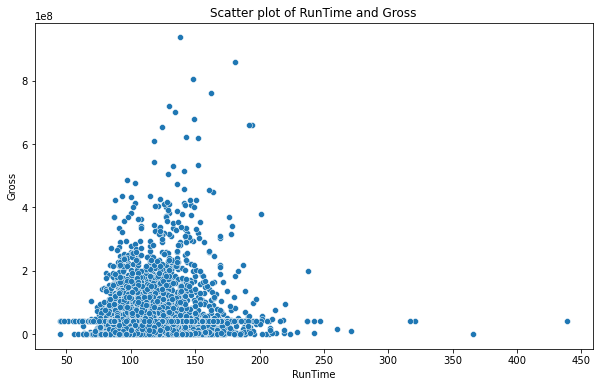

Kruskal-Wallis test between RunTime and Gross: H-statistic: 14752.982038183314, p-value: 0.0


Descriptive Analysis for Votes:
count    1.000000e+04
mean     9.279738e+04
std      1.716509e+05
min      1.000200e+04
25%      1.685175e+04
50%      3.417950e+04
75%      9.154600e+04
max      2.804443e+06
Name: Votes, dtype: float64




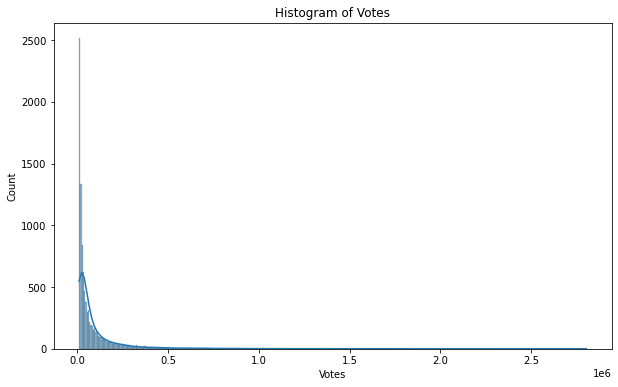

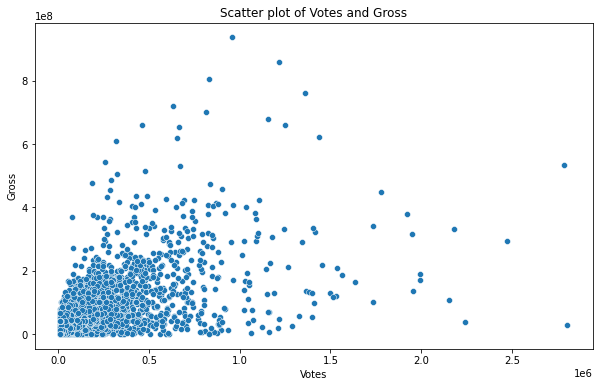

Kruskal-Wallis test between Votes and Gross: H-statistic: 13010.485149307584, p-value: 0.0




In [93]:
analyze_numeric_variables_int(df_data, target='Gross')

### Análisis de resultados:

#### YearOfRelease:

+ Del análisis descriptivo, obtenemos que la variable tiene una distribución amplia, con años que van desde 1915 hasta 2023, la media se encuentra al rededor de 2001.
+ Del histograma, obtenemos que la mayoría de los lanzamientos fueron entre 2010 y 2020.
+ Del gráfico de dispersión podemos ver que algunas películas tuvieron buena recaudación, sin embargo, la mayoría se mantiene en la zona media a baja.
+ De la prueba de Kruskal-Wallis obtenemos que la variación de la estadística H es 14753.496040277349, mientras que el p-value es 0.0, esto indica fuertes evidencias contra la hipótesis nula, por lo tanto hay una diferencia significativa en recaudación entre los diferentes años de lanzamiento.
+ En conclusión, el año de lanzamiento, parece tener un impacto significativo en la recaudación de la película.

#### RunTime:

+ Del análisis descriptivo, obtenemos que la duración promedio es de 110.7 minutos, mientras que las películas más corta y más larga son de 45 y 439 minutos respectivamente.
+ Del histograma, obtenemos que la mayoría se mantiene en torno a los 100 minutos
+ Del gráfico de dispersión podemos ver que no necesariamente la mayor duración está relacionada con una mayor recaudación.
+ De la prueba de Kruskal-Wallis obtenemos que la variación de la estadística H es 14752.982038183314, p-value: 0.0, en pocas palabras, hay relación entre la duración de una película y sus ganancias.
+ En conclusión, la duración de la película, parece tener un impacto significativo en la recaudación de la misma.

#### Votes:

+ Del análisis descriptivo, obtenemos que el promedio  de votos es de 92797 y una desviación estándar de 171650, lo que muestra gran variabilidad en el número de votos
+ Del histograma, obtenemos que la mayoría se mantiene en torno a los primeros valores.
+ Del gráfico de dispersión podemos ver que hay una agrupación entre la cantidad de votos recibidos y el dinero que recaudó la película. 
+ De la prueba de Kruskal-Wallis obtenemos que la variación de la estadística H es 13010.485149307584, p-value: 0.0, en pocas palabras, hay relación entre los votos recibidos por una película y sus ganancias.
+ En conclusión, parece haber asociación entre la cantidad de votos recibidos y las ganancias obtenidas.

### Análisis de Variables Numéricas Flotantes

In [94]:
def analyze_numeric_variables_float(df, target=None):
    df_copy = df.copy()
    
    num_cols = df_copy.select_dtypes(include=['float64']).columns
    
    for col in num_cols:
        # Reemplazamos los valores nulos con la media
        df_copy[col].fillna(df_copy[col].mean(), inplace=True)
        
        # Imprimimos el analisis descriptivo de la columna
        print(f"Descriptive Analysis for {col}:")
        print(df_copy[col].describe())
        print("\n")
        
        # Generamos un histograma de la columna
        plt.figure(figsize=(10, 6))
        sns.histplot(df_copy[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.show()
        
        # Si se proporciona una variable objetivo, realizamos un análisis adicional
        if target is not None:
            # Reemplazamos los valores nulos en la variable objetivo con la media
            df_copy[target].fillna(df_copy[target].mean(), inplace=True)
            
            # Generamos un boxplot entre la columna y la variable objetivo
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df_copy[col])
            plt.title(f'Box plot of {col}')
            plt.show()
            
            # Realizamos una correlación de Spearman entre la columna y la variable objetivo
            correlation, p_value = stats.spearmanr(df_copy[col], df_copy[target])
            print(f"Spearman correlation between {col} and {target}: {correlation}, p-value: {p_value}")
            print("\n")

Descriptive Analysis for MovieRating:
count    10000.000000
mean         6.727020
std          0.821264
min          4.900000
25%          6.100000
50%          6.700000
75%          7.300000
max          9.300000
Name: MovieRating, dtype: float64




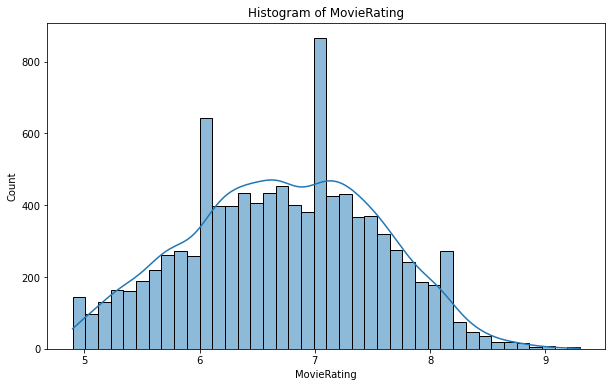

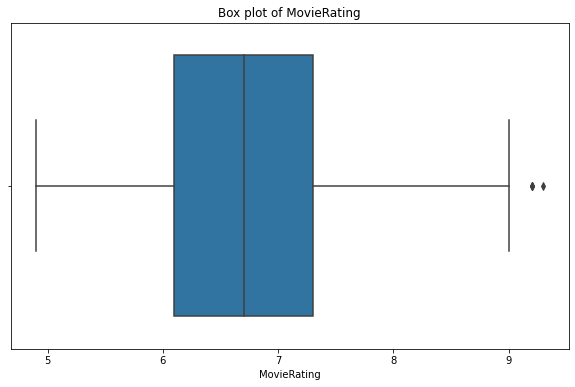

Spearman correlation between MovieRating and Gross: -0.017662438145564188, p-value: 0.07736887907085993


Descriptive Analysis for MetaScore:
count    10000.000000
mean        59.171432
std         15.420365
min          7.000000
25%         50.000000
50%         59.171432
75%         68.000000
max        100.000000
Name: MetaScore, dtype: float64




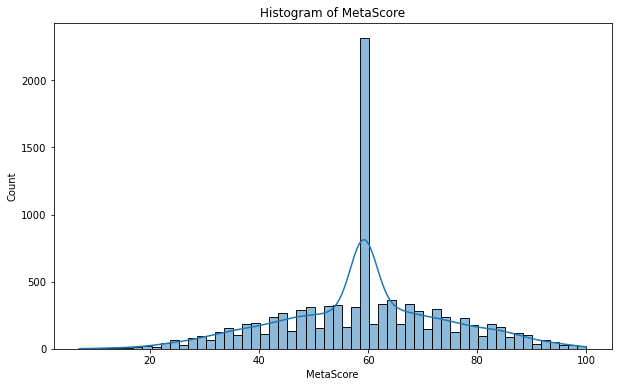

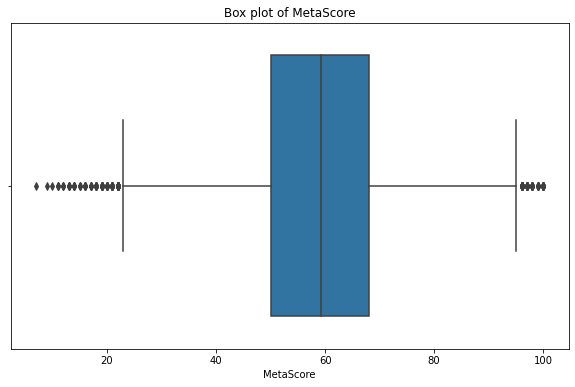

Spearman correlation between MetaScore and Gross: -0.05992469234306201, p-value: 2.00860397647773e-09


Descriptive Analysis for Gross:
count    1.000000e+04
mean     4.017500e+07
std      5.680393e+07
min      0.000000e+00
25%      6.597500e+06
50%      4.017500e+07
75%      4.017500e+07
max      9.366600e+08
Name: Gross, dtype: float64




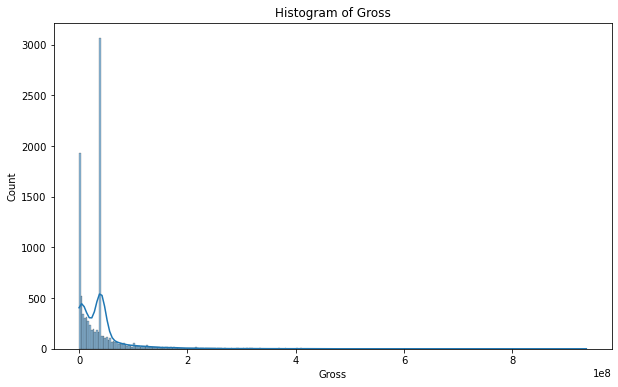

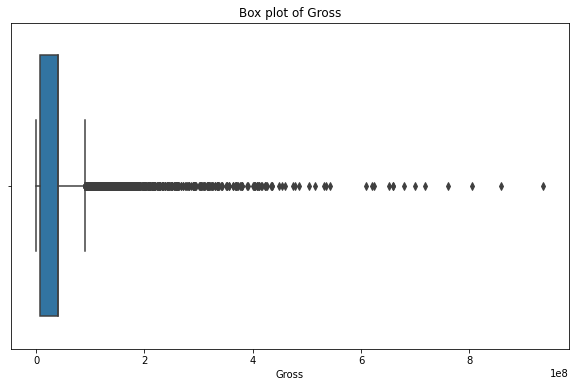

Spearman correlation between Gross and Gross: 1.0, p-value: 0.0




In [95]:
analyze_numeric_variables_float(df_data, target='Gross')

### Análisis de resultados

#### MovieRating:

+ Respecto del análisis descriptivo tenemos que la calificación promedio es de 6.73, con una desviación estándar bastante baja de solo 0.82, lo que indica poca variabilidad.
+ Del histograma tenemos el mayor score entregado está en 7, con más de 800 repeticiones.
+ Del gráfico de caja obtenemos que la tendencia de calificaciones está entre 6 y 7 para aquellas películas que más recaudaron.
+ De la correlación de Spearman está en -0.017662438145564188, p-value: 0.07736887907085993 la relación es my débil, y el p-value mayor que 0.05 nos indica que no parece haber relación significativa.
+ En conclusión el rating recibido por una película no parece estar relacionado con el dinero recaudado por la misma.

#### MetaScore:

+ Respecto del análisis descriptivo tenemos que el puntaje promedio es de 59.17, con una desviación estándar de 15.42, lo que indica que hay una variabilidad considerable entre los puntajes.
+ Del histograma tenemos el mayor score entregado está en torno a 59 y 60, con más de 2000 puntajes similares.
+ Del gráfico de caja obtenemos que la tendencia de puntajes está entre 50 y 70 aquellas películas que más recaudaron.
+ De la correlación de Spearman está en -05992469234306201, al estar cerca de 0, nos indica que no hay una relación fuerte, además el p-value es 2.00860397647773e-09 el cual nos indica que la correlación observada es significativa a pesar que la realación sea débil.
+ En conclusión parace haber una relación entre el puntaje de MetaScore obtenido y lo recaudado por la película, aunque a medida que el puntaje aumenta, la recaudación tiende a disminuir ligeramente.

## 2. Preprocesamiento de datos

Lo primero que realizamos fue cambiar los valores NaN de las columnas Gross, MetaScore y Certification. Para esto decidimos dividir las columnas y trabajarlas de distinta forma dependiendo de las circunstancias y contexto de cada columna. 

Empezamos con la columna de MetaScore para esta eliminamos las columnas de Gross y Certification para que no influyeran al contar con los valores NaN. Luego procedimos a realizar una imputación de los datos realizando un modelo de regresión. 

In [96]:
dataMeta = df_data.drop(['Gross', 'Certification','MovieName','Genre','Director','Stars','Description'], axis=1)

In [97]:
dataMeta_no_null = dataMeta.dropna(subset=['MetaScore'])
dataMeta_null = dataMeta[dataMeta['MetaScore'].isnull()]

# Paso 1: Identificación de variables predictoras y variable objetivo
X = dataMeta_no_null.drop(['MetaScore'], axis=1)
y = dataMeta_no_null['MetaScore']

# Paso 2: Entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Paso 3: Predicción de valores nulos
predicciones = model.predict(dataMeta_null.drop(['MetaScore'], axis=1))

# Paso 4: Imputación de valores nulos
dataMeta.loc[dataMeta['MetaScore'].isnull(), 'MetaScore'] = predicciones

Para esto definimos variables objetivo (MetaScore) y el resto servirían como variables predictoras luego entrenamos el modelo dividiendo en valores con y sin NaN, y dividiendo los valores sin NaN para realizar una predicción a los valores NaN. Una vez se realiza esto se ingresan los datos en el dataframe original. 

In [98]:
df_data['MetaScore'] = dataMeta['MetaScore']
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MovieName      10000 non-null  object 
 1   YearOfRelease  10000 non-null  int64  
 2   RunTime        10000 non-null  int64  
 3   MovieRating    10000 non-null  float64
 4   Votes          10000 non-null  int64  
 5   MetaScore      10000 non-null  float64
 6   Gross          7085 non-null   float64
 7   Genre          10000 non-null  object 
 8   Certification  9631 non-null   object 
 9   Director       10000 non-null  object 
 10  Stars          10000 non-null  object 
 11  Description    10000 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 937.6+ KB


Podemos ver que se cambiaron los valores nulos por los nuevos valores.

Este proceso es el mismo que se llevó a cabo con la columna de Gross, la gran diferencia fue que ahora al contar con los datos de MetaScore pudimos incluir esta en las variables predictoras y así tener más datos para hacer las predicciones.

In [99]:
dataGross = df_data.drop(['Certification','MovieName','Genre','Director','Stars','Description'], axis=1)

In [100]:
dataGross_no_null = dataGross.dropna(subset=['Gross'])
dataGross_null = dataGross[dataGross['Gross'].isnull()]

# Paso 1: Identificación de variables predictoras y variable objetivo
X = dataGross_no_null.drop(['Gross'], axis=1)
y = dataGross_no_null['Gross']

# Paso 2: Entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Paso 3: Predicción de valores nulos
predicciones = model.predict(dataGross_null.drop(['Gross'], axis=1))

# Paso 4: Imputación de valores nulos
dataGross.loc[dataGross['Gross'].isnull(), 'Gross'] = predicciones

In [102]:
df_data['Gross'] = dataGross['Gross']
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MovieName      10000 non-null  object 
 1   YearOfRelease  10000 non-null  int64  
 2   RunTime        10000 non-null  int64  
 3   MovieRating    10000 non-null  float64
 4   Votes          10000 non-null  int64  
 5   MetaScore      10000 non-null  float64
 6   Gross          10000 non-null  float64
 7   Genre          10000 non-null  object 
 8   Certification  9631 non-null   object 
 9   Director       10000 non-null  object 
 10  Stars          10000 non-null  object 
 11  Description    10000 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 937.6+ KB


Por último, para la columna de Certification llegamos a la conclusión de remplazar los NaN por NotRated.

In [103]:
df_data['Certification'].fillna('Not Rated', inplace=True)

Creamos clases numéricas basadas en intervalos de ganancias

In [104]:
bins = [-float('inf'), 25000000, float('inf')]
labels = [0, 1]  # Puedes ajustar estos valores según tus necesidades

Agregamos una nueva columna 'Ganancias' al DataFrame

In [105]:
df_data['Ganancias'] = pd.cut(df_data['Gross'], bins=bins, labels=labels)

### 3. Modelos de Machine Learning